# Connective Media Data Analysis - Gowalla Social Network
##<span style="color:#B0AEAE">Authors: Shawn Bramson and Oliver Hoffman</span>


## 1. Abstract

The success of Social Network Sites (SNS) heavily depends on the amount of active users who engage in the service and their contributions. It is common for many of these users to access SNSs with the sole purpose of benefiting from the contributions of a few. In that sense, the developers and designers of the services find it necessary to motivate users to contribute more content to the site. To keep the service alive the service must attract new users and keep the current ones engaged. 

Social behaviour theory is often applicable to Connective Media applications. Being able to identify the key concepts in these theories and how they apply both to the design and execution of a SNS would be highly benefitial to the developers behind them. More specifically it would help them gain insight into their users' behaviour and identify the areas in which their services can be improved. 

In this assignment we intend to use some of the Connective Media theories learned throughout the semester to analyze the _Gowalla Social Network_ and see how they apply. The theories we use, include:

* Burke's work on **social learning**, which explains that:
  > _From the perspective of a user, a social network site is primarily comprised of a set of friends and the content they produce. Therefore, **one likely influence on newcomers’ behavior is the behavior of their friends.** Social learning theory suggests that **people learn by observation in social situations, and that they will begin to act like people they observe** even without external incentives._

  We are going to analyze the _Gowalla Social Network_ and see if there is a direct influence on the motivation of users to contribute more based on what they observe in others.  
  
  
* Peerce's work on the **Reader-to-Leader framework**, which categorizes users into _readers, contributors, collaborators, and leaders_. Based on this framework (adapting it of course to the social network in question), we would like to identify the key users (leaders) who are responsible for the motivation to contribute on most users of the _Gowalla Social Network_ and who are the readers (who simply use the social network to get information from it). 


* Granovetters's work on **strong ties and weak ties**, which explains how users are influenced by the information they receive from their weak ties (in many cases even more so than the information received from their strong ties). We are going to try and analyze what connections are most likely to be the weak ties in the social network as well as the strong ties. 


## 2. Data Overview

The dataset on which our analysis will be carried out is the [SNAP's Gowalla Social Network](http://snap.stanford.edu/data/loc-gowalla.html) dataset. [Gowalla](http://en.wikipedia.org/wiki/Gowalla) was a location-based social networking website where users shared their locations by checking-in. The files included in the dataset contain information over the period of Feb. 2009 - Oct. 2010 and include:

* An undirected graph of the friendship network which was collected using their public API, and consists of 196,591 nodes and 950,327 edges.

* A total of 6,442,890 geo-tagged check-ins for each user.

### 2.1 Structure of the data

Before beginning the analysis process it is necessary to see if there are no problems accessing the files and then checking what the structure of the data looks like:

#### Gowalla's Graph Connections File (data/edges.txt)

The column structure of the file should be:
1. The user ID
2. The ID of her/his friend

In [65]:
import os
DIR_PATH = os.getcwd()  # Get currect directory
N = 10                  # Number of data points to take

# Open edges file and print to see structure
f = open(DIR_PATH + os.sep + "data/edges.txt")
for i in range(N):
    line=f.next().strip().split('\t')
    print line
f.close()

['0', '1']
['0', '2']
['0', '3']
['0', '4']
['0', '5']
['0', '6']
['0', '7']
['0', '8']
['0', '9']
['0', '10']


#### Gowalla's Users Check-ins File (data/checkins.txt)

The column structure of the file should be:
1. The user ID
2. Check-in time
3. Check-in location's latitude
4. Check-in location's longitude
5. Check-in location's ID (found to be unique for every lat/lon)

In [66]:
# Open edges file and print to see structure
f = open(DIR_PATH + os.sep + "data/checkins.txt")
for i in range(N):
    line=f.next().strip().split('\t')
    print line
f.close()

['0', '2010-10-19T23:55:27Z', '30.2359091167', '-97.7951395833', '22847']
['0', '2010-10-18T22:17:43Z', '30.2691029532', '-97.7493953705', '420315']
['0', '2010-10-17T23:42:03Z', '30.2557309927', '-97.7633857727', '316637']
['0', '2010-10-17T19:26:05Z', '30.2634181234', '-97.7575966669', '16516']
['0', '2010-10-16T18:50:42Z', '30.2742918584', '-97.7405226231', '5535878']
['0', '2010-10-12T23:58:03Z', '30.261599404', '-97.7585805953', '15372']
['0', '2010-10-12T22:02:11Z', '30.2679095833', '-97.7493124167', '21714']
['0', '2010-10-12T19:44:40Z', '30.2691029532', '-97.7493953705', '420315']
['0', '2010-10-12T15:57:20Z', '30.2811204101', '-97.7452111244', '153505']
['0', '2010-10-12T15:19:03Z', '30.2691029532', '-97.7493953705', '420315']


## 3. Data Analysis

Based on the Connective Media theories explained above we analyze the dataset for each theory accordingly:

* **Social learning**: is there a direct influence on the motivation of users to contribute more based on what they observe in others.   

    * Determine whether the service is used more on average (by considering check-in frequency, i.e. the number of times users checked in) based on the amount of connections in a user's social network.
    * Determine whether the service is used more on average (by considering the number of days users were active onthe service) based on the amount of connections in a user's social network.
    * Determine whether users tend to progressively use the service more based on the number of friends they gain over time.
    * Analyze how the check-in dynamic is influenced in terms of checking in all alone vs. with friends (Do users tend to check in moments after their friends checked in?)


* **Reader-to-Leader framework**: we want to identify the _readers, contributors, and leaders_ in the Gowalla Social Network. 

    * Identify the category to which a user belongs by analyzing the number of times users have checked in over the total time they were active in the network. 
    * In order to identify the leaders in the network, it is not so much about the number of times they have checked in over time but about the influence they have on others. In that sense, using the previous analysis of how the check-in dynamic is influenced by others, leaders would be the people that have the most influence on others.
    
    
* **Strong ties and weak ties**: we are going to try and analyze what connections are most likely to be the strong ties and weak ties in the social network.

    * Identify the strengh of a user connection by counting how many friends the 2 users have in common
    * Based on that strengh, determine which ones are strong and which ones are weak ties
    

Before proceeding to perform the data analysis, we are going to gather the variables we will most likely need for our analysis. These variables include:

* Users ID
* Number of friends
* Number of days between first and last check-in
* Number of active days a user has used the service
* Total number of check-ins for a user

In [67]:
from datetime import datetime
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

UID = 0
TIM = 1
LAT = 2
LON = 3
LID = 4

#Gets the number of days between 2 dates
def cal_days_diff(a,b):
    A = a.replace(hour = 0, minute = 0, second = 0, microsecond = 0)
    B = b.replace(hour = 0, minute = 0, second = 0, microsecond = 0)
    return (A - B).days

#Get number of friends a node has
def get_number_connections(filename, nodes):
    with open(DIR_PATH + os.sep + filename, "rb") as input_data:
        data = [line.strip().split('\t') for line in input_data]
        for line in data:
            node = int(line[0])
            friend = int(line[1])
            if node not in nodes:
                nodes[node] = {}
                nodes[node]['connections'] = 1
                nodes[node]['friends_list'] = [friend]
            else:
                nodes[node]['connections'] += 1
                nodes[node]['friends_list'].append(friend)
    return None

#Get number of days a user has been in the system
def get_number_days(filename, nodes):
    temp_nodes = {}
    with open(DIR_PATH + os.sep + filename, "rb") as input_data:
        data = [line.strip().split('\t') for line in input_data]
        for line in data:
            node = int(line[0])
            if node not in temp_nodes:
                temp_nodes[node] = {}
                temp_nodes[node]['last'] = datetime.strptime(line[1], '%Y-%m-%dT%H:%M:%SZ')
                temp_nodes[node]['first'] = datetime.strptime(line[1], '%Y-%m-%dT%H:%M:%SZ')
                temp_nodes[node]['count'] = 1
                temp_nodes[node]['count_date'] = [temp_nodes[node]['first']]
                temp_nodes[node]['active_days'] = 1
                temp_nodes[node]['check_ins'] = {}
                temp_nodes[node]['check_ins'][temp_nodes[node]['last']] = [float(line[LAT]), float(line[LON])]
            else:
                prev = temp_nodes[node]['first']
                temp_nodes[node]['first'] = datetime.strptime(line[1], '%Y-%m-%dT%H:%M:%SZ')
                if prev.date() != temp_nodes[node]['first'].date():
                    temp_nodes[node]['active_days'] += 1
                temp_nodes[node]['count'] += 1
                temp_nodes[node]['count_date'].append(temp_nodes[node]['first'])
                temp_nodes[node]['check_ins'][temp_nodes[node]['first']] = [float(line[LAT]), float(line[LON])]
                

    for node_val in temp_nodes:
        num_days = cal_days_diff(temp_nodes[node_val]['last'],temp_nodes[node_val]['first'])
        nodes[node_val]['number_of_days'] = num_days + 1
        nodes[node_val]['number_of_checkins'] = temp_nodes[node_val]['count']
        nodes[node_val]['number_of_active_days'] = temp_nodes[node_val]['active_days']
        nodes[node_val]['first_checkin'] = temp_nodes[node_val]['first']
        nodes[node_val]['last_checkin'] = temp_nodes[node_val]['last']
        nodes[node_val]['count_date'] = sorted(temp_nodes[node_val]['count_date'])
        nodes[node_val]['check_ins'] = temp_nodes[node_val]['check_ins']

    return None

nodes = {}
get_number_connections('data/edges.txt', nodes)
get_number_days('data/checkins.txt', nodes)

    
### 3.1 Social Learning

Now that we have all our information loaded, we are going to see if there is a direct influence on the motivation of users to contribute more based on what they observe in others. 

#### Constraints

Identifying social learning in a dataset is limited by the data it contains. In order to identify the influence on the motivation of users to contributed based on the activity of others, it is necessary to have much more detailed information about the connectons between users. Our dataset only gives us information about 2 nodes becoming friends, but it does not specify when this friendship began in the _Gowalla Social Network_. It also does not contain information about when a user signed up to the service for the first time.

Based on this, we make the following **assumptions** to be able to perform more interesting analysis:

* The sign up date (and therefore the first time the users used the service) is considered to be the date of their first check-in.

* The date the users stopped using the service is considered to be the date of their last check-in.

* Users become friends the moment that both have joined the service. i.e. first time both users checked in (see above). 

#### Comparing number of check-ins to number of friends

In order to do so the first thing we are going to do is analyze the number of check-ins users have based on the number of connections (friends). While this does not imply necessarily that users are checking in more because their friends are doing so, it does help establish a relationship based on that having more friends makes users tend to check in more:

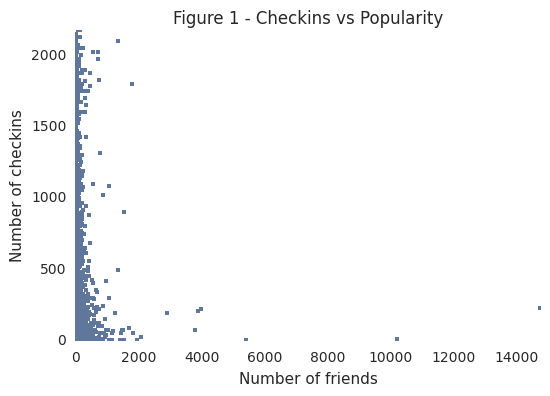

In [69]:
%matplotlib inline
import pylab
pylab.rcParams['savefig.dpi'] = 100 

X = []
Y = []
temp = {}
for node in nodes:
    #if popCheckIn[key][0]/float(maxVal) < 0.05:
    X.append(nodes[node]['connections'])
    if 'number_of_checkins' not in nodes[node]:
        Y.append(0)
    else:
        Y.append(nodes[node]['number_of_checkins'])
    try:
        if 'number_of_checkins' not in nodes[node]:
            temp[nodes[node]['connections']].append(0)
        else:
            temp[nodes[node]['connections']].append(nodes[node]['number_of_checkins'])
    except:
        if 'number_of_checkins' not in nodes[node]:
            temp[nodes[node]['connections']] = [0]
        else:
            temp[nodes[node]['connections']] = [nodes[node]['number_of_checkins']]
        
#Plot
def plot(X,Y, title, xlabel, ylabel, plottype='', limX=max(i for i in X), limY=max(i for i in Y)):
    
    #plt.figure()
    sns.set_palette("deep", desat=.6)
    plt.plot(X, Y,plottype)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(0, limX)
    plt.ylim(0, limY)
    plt.show()
    
plot(X,Y,"Figure 1 - Checkins vs Popularity", "Number of friends", "Number of checkins", ".")

Figure 1 shows the number of checkins users have based on the number of friends they have. As it can be seen, there are outliers with people having over 14,000 friends. Therefore, it would make sense to consider the first few hundred first to see if any interesting trends can be identified:

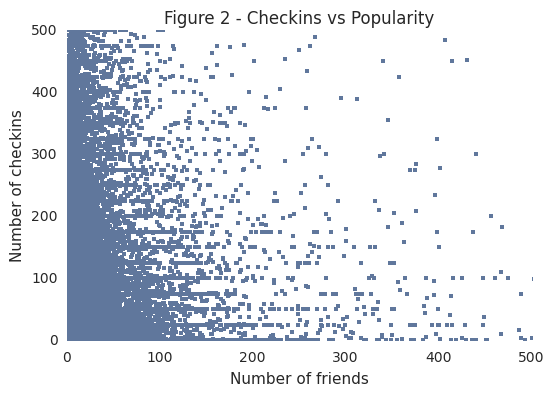

In [70]:
plot(X,Y,"Figure 2 - Checkins vs Popularity", "Number of friends", "Number of checkins", ".", 500,500)

Figure 2 shows how people with any number of friends can have any number of checkins. However, we now want to see if there is a trend, that is, do people with more friends tend to **on average** to check in more?

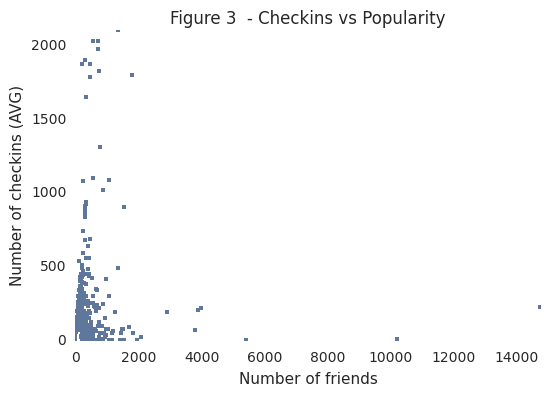

In [71]:
Xavg = []
Yavg = []
for key in temp:
    Xavg.append(key)
    Yavg.append(sum(temp[key])/float(len(temp[key])))
plot(Xavg,Yavg,"Figure 3  - Checkins vs Popularity", "Number of friends", "Number of checkins (AVG)", ".", max(Xavg), max(Yavg))

Figure 3 shows the number of checkins users have on average based on their number of friends. However, once again the outliers make it too complicated to make any conclusions. We narrow our view and filtering to people with 100 friends. We will now plot the data a little closer to see if there are any interesting results.

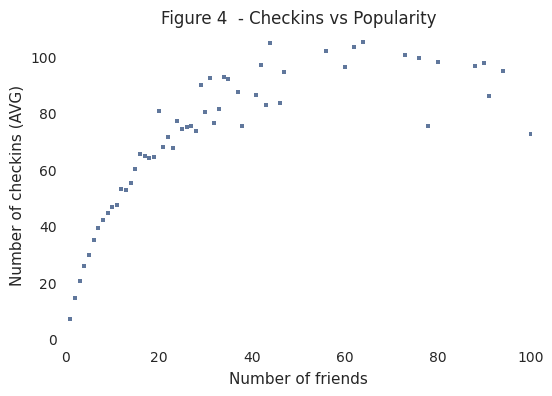

In [72]:
plot(Xavg,Yavg,"Figure 4  - Checkins vs Popularity", "Number of friends", "Number of checkins (AVG)", ".", 100, 110)

Figure 4 shows much more interesting results! As it can be seen, there is a logarithmic trend for users to, on average, have an increased number of checkins based on the number of friends they have. Once the number of friends reaches around 50, however, the trend tends to slow down significantly. 

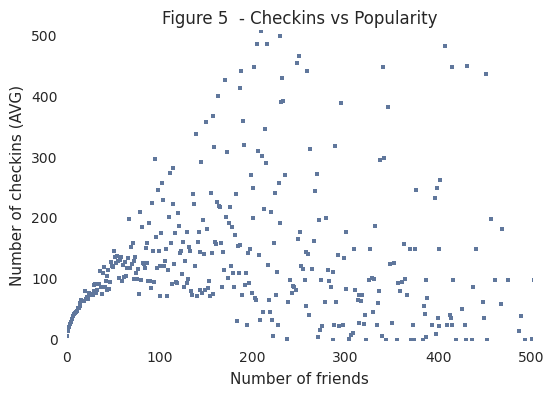

In [73]:
plot(Xavg,Yavg,"Figure 5  - Checkins vs Popularity", "Number of friends", "Number of checkins (AVG)", ".", 500, 510)

Figure 5 shows how on average users tend to have more checkins the greater their number of friends is. This trend however can only be considered until around 100 friends, after which the maximum number of checki-ns keeps increasing but there is so much variance that an average cannot be established. These results however are quite interesting! The next logical step is then determining for how much of the entire user population they apply to. In order to do that, we are going to check the density distribution of users based on the number of friends they have:

Buckets of X:

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300, 15400, 15500, 1560

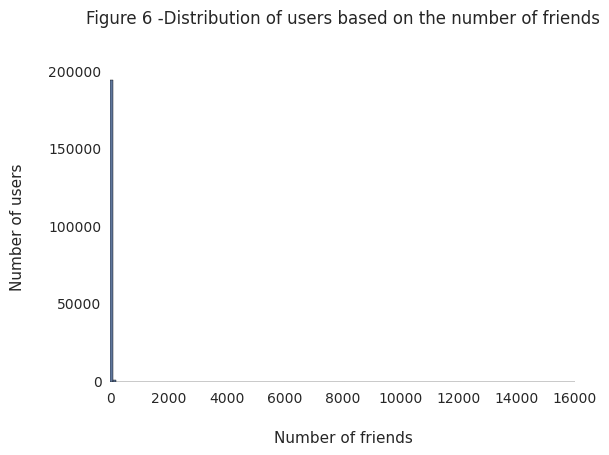

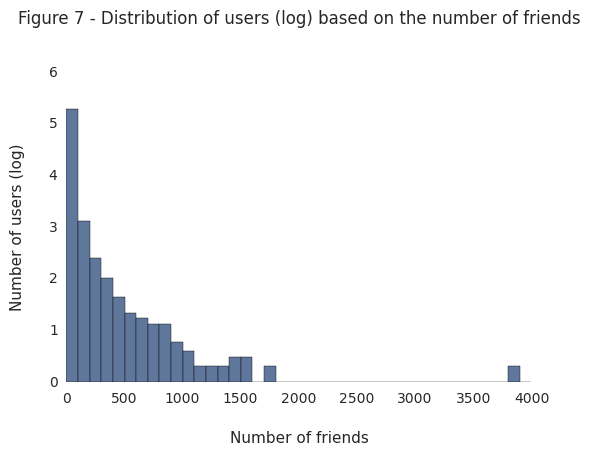

In [74]:
import math

X = []
Y = []
Y_log = []

# We know the max is around 16,000 connections
buckets = {}
bucket_size = 100
max_bucket = 16000

for i in xrange(0,max_bucket,bucket_size):
    buckets[i] = 0
    X.append(i)

for node in nodes:
    connections = nodes[node]['connections']
    bucket_id = connections/100
    bucket_id *= 100
    buckets[bucket_id] += 1
    
for value in X:
    Y.append(buckets[value])
    if buckets[value] != 0:
        Y_log.append(math.log(buckets[value],10))
    else:
        Y_log.append(0)

plt.figure()
plt.bar(X,Y, width= 100)
plt.title("Figure 6 -Distribution of users based on the number of friends\n\n")
plt.xlabel("\nNumber of friends")
plt.ylabel("Number of users\n")
plt.figure()
plt.bar(X,Y_log, width= 100)
plt.title("Figure 7 - Distribution of users (log) based on the number of friends\n\n")
plt.xlabel("\nNumber of friends")
plt.ylabel("Number of users (log)\n")

print "Buckets of X:\n" 
print X
print "\nBuckets of Y:\n"
print Y

Figure 6 and Figure 7 show the distribution of users based on the number of friends they have (Figure 7 shows them in logarithmic scale to visualize the results better). It can be seen how more than 95% of the users belong to the category of between 0 and 100 users. Because of this, the rest of our analysis will be based on this group of users. 

#### Comparing number of active days vs number of friends

We are now going to consider whether the service is used more on average (based on the amount of active days users used the service) considering the amount of friends. This is different than the previous analysis in the sense that a user could have simply checked in many times the first day of the service regardless of the number of friends they had. Using this analysis, we can now see ** how much time users actively spent on the service ** based on their number of friends. 

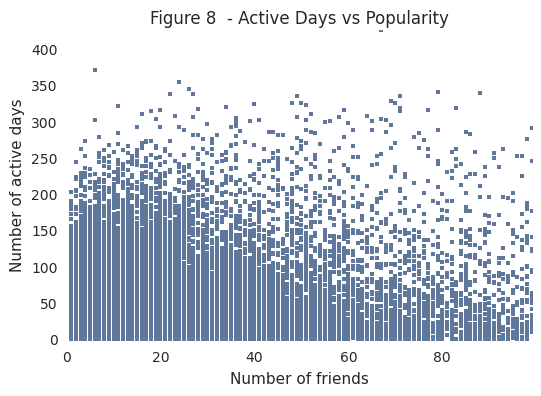

In [75]:
X = []
Y = []

for node in nodes:
    #We now look only at our filtered data
    if nodes[node]['connections'] < 100: 
        if 'number_of_active_days' in nodes[node]:
            Y.append(nodes[node]['number_of_active_days'])
            X.append(nodes[node]['connections'])
            
plot(X,Y,"Figure 8  - Active Days vs Popularity", "Number of friends", "Number of active days", ".", max(X), max(Y))

Figure 8 shows the number of active days users spent on the service compared to the number of friends they have. It can be seen, like in the previous check-in example, that users with any number of friends, tend to spend any number of active days in the service. We are therefore now going to show the average number of active days based on number of friends to see if we can find a trend:

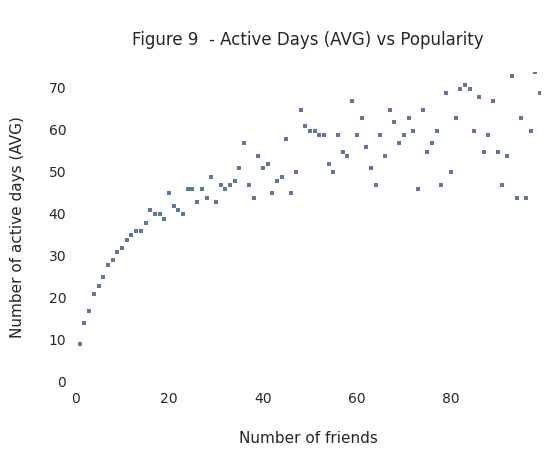

In [76]:
X = []
Y = []
temp = {}
for node in nodes:
    #We now look only at our filtered data
    if nodes[node]['connections'] < 100: 
        if 'number_of_active_days' in nodes[node]:
            if nodes[node]['connections'] not in temp:
                temp[nodes[node]['connections']] = [nodes[node]['number_of_active_days']]
            else:
                temp[nodes[node]['connections']].append(nodes[node]['number_of_active_days'])
           
for val in temp:
    X.append(val)
    Y.append(sum(temp[val])/len(temp[val]))
            
plot(X,Y,"\nFigure 9  - Active Days (AVG) vs Popularity\n", "\nNumber of friends", "Number of active days (AVG)\n", ".", max(X), max(Y))

Figure 9 once again reveals an interesting trend: users with more friends tend to be more active in the service (at least for the first 30 friends). 

#### Determine whether users tend to progressively use the service the more they gain friends over time

We are now going to analyze and check whether users tend to use the service more the more friends they gain. It is important to note that regardless of whether there is a correlation between the variables, causality should not be established. That is, even if it can be seen that users tend to use the service more the more friends they have, it could simply be because of the passage of time (since users increasingly gain more friends). We will however compare the 2 graphs (over time alone and over gaining friends) to see how they differ.

The process of this analysis is the following:

* For every user, we keep track of when he got to X amount of friends (X being in increments of 5).
* For every user, we then keep track of how many times he checked in after gaining X amount of friends.

In [77]:
for node in nodes:
    #if node == 75:
       # print nodes[node]['count_date']
    if nodes[node]['connections'] <= 100:
        friendships = {}
        for friend in nodes[node]['friends_list']:
            if 'first_checkin' in nodes[node]:
                date1 = nodes[node]['first_checkin']
                if 'first_checkin' in nodes[friend]:
                    date2 = nodes[friend]['first_checkin']
                    friendship_date = max(date1, date2)
                else:
                    date2 = "None"
                    friendship_date = date1
                if friendship_date not in friendships:
                    friendships[friendship_date] = [friend]
                else:
                    friendships[friendship_date].append(friend)
        
        nodes[node]['friendships_dates'] = friendships

for node in nodes:
    if nodes[node]['connections'] <= 100:
        if 'friendships_dates' in nodes[node]:
            if nodes[node]['friendships_dates'] != "None":
                
                nodes[node]['friend_count_checkin'] = {}
                got_all = False
                friend_count = 0
                friend_index = 5
                sorted_fr_dates = sorted(nodes[node]['friendships_dates'])

                for fr_date in sorted_fr_dates:
                    #for friend_c in range():
                        friend_count += len(nodes[node]['friendships_dates'][fr_date])
                        if friend_count >= friend_index:
                            checkin_count = 0
                            for ck_date in nodes[node]['count_date']:
                                if ck_date <= fr_date:
                                    checkin_count += 1

                            checkin_count2 = 0
                            for friend_index2 in nodes[node]['friend_count_checkin']:
                                checkin_count2 += nodes[node]['friend_count_checkin'][friend_index2]
                            checkin_count = checkin_count - checkin_count2
                               
                            nodes[node]['friend_count_checkin'][friend_index] = checkin_count
                               
                            friend_index += 5
                            
                            if friend_index > nodes[node]['connections']:
                                final_count = nodes[node]['number_of_checkins'] - (checkin_count + checkin_count2)
                                if final_count > 0:
                                    nodes[node]['friend_count_checkin'][friend_index] = final_count

Now that we have gathered the information, we are going to normalize the results, in order to graph the average frequency of checkins based on when a user made X amount of friends:

In [78]:
X = []
Y = []
Y_dict = {}
for i in range(5,105,5):
    X.append(i)
    Y_dict[i] = []
    
for node in nodes:
    if nodes[node]['connections'] <= 100:
        if 'friend_count_checkin' in nodes[node]:
            if 'number_of_checkins'in nodes[node]:
                total_checkins = nodes[node]['number_of_checkins']
                for i in range(5,105,5):
                    if i in nodes[node]['friend_count_checkin']:
                        Y_dict[i].append(float(nodes[node]['friend_count_checkin'][i])/total_checkins)
        
for i in sorted(Y_dict):
    Y.append(sum(Y_dict[i])/len(Y_dict[i]))
    

In [79]:
print X
print Y

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
[0.22324609485476243, 0.49555987864680673, 0.28012778500859764, 0.2040719854586753, 0.16317924507004053, 0.1369486160351932, 0.11999794102092677, 0.11093016182067386, 0.10233957100239033, 0.09530222395418764, 0.09164302273087818, 0.0896270911703805, 0.0842535498964907, 0.08376805485881278, 0.08171825677385369, 0.08046497912184622, 0.075455233707605, 0.06899151075941262, 0.07700316548295932, 0.08208736100324322]


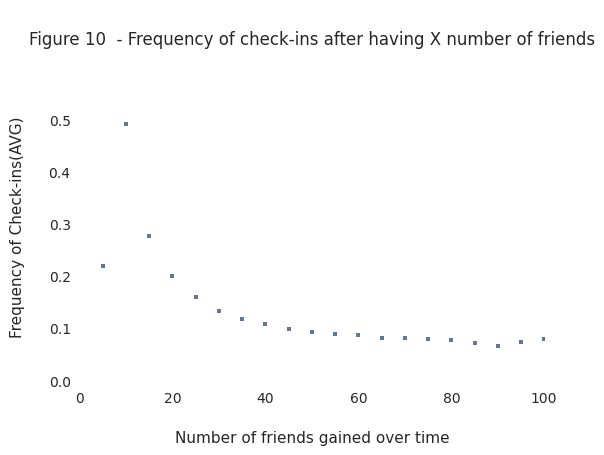

In [80]:
plot(X,Y,"\nFigure 10  - Frequency of check-ins after having X number of friends\n", "\nNumber of friends gained over time", "Frequency of Check-ins(AVG)\n", ".", max(X), max(Y)+0.1)

Figure 10 shows how the frequency of checkins on average based on the number of friends users gain over time. Once again, it is important to note the assumptions previously stated, and take these results with caution. Having said that, it can be seen that users tend to start using the service the most while they gain thier first few friends. As an example, users with only 5 friends made 20% of their checkins during that period. This amount increases to almost 50% for users with 10 friends, and then starts decreasing slowly until around 50 friends, where it stays steady. It is worth mentioning that after a certain point (50 friends) it would be expected for users' check-ins to continue declining, but its possible that this does not happen do to friends' influence. 

#### How is the check-in dynamic influenced in terms of checking in all alone vs friends?

In other words, are people more likely to check-in after their friends did? In order to do this we are going to calculate the frequency of users checking-in after their friends checking-in, saving as well the number of friends that checked-in. The process therefore is the following:

* For every user get his check-in times
* For every friend of the user get his check-in times
* Compare every check-in between them that occured within 10 minutes
* If they coincide add a count to the number of friends the user is checking in with
* Save the results

In [83]:
#timedelta = 600 seconds, i.e. 10 minutes
timedelta = 600 

#distancedelta = 500 meters, i.e. 0.5 km
distancedelta = 0.5

checkinwfriends = {}
leaders = {}
for node in nodes:
    if 'count_date' in nodes[node] and nodes[node]['connections'] < 100:
        checkinwfriends[node] = {}
        for time in nodes[node]['count_date']:
            friendCount = 0
            friendCount2 = 0
            for friend in nodes[node]['friends_list']:
                if 'count_date' in nodes[friend]:
                    for ftime in nodes[friend]['count_date']:
                        # if abs((time-ftime).total_seconds()) < timedelta and get_distance(checkins[user][time][0],checkins[user][time][1],
                        #     checkins[friend][ftime][0], checkins[friend][ftime][1]) < distancedelta:
                        days_between = abs(cal_days_diff(time,ftime))
                        if days_between > 1:
                            break
                        else:
                            time_between = (time-ftime).total_seconds()
                            if time_between <= timedelta and time_between > 0:
                                friendCount += 1
                                if friend not in leaders:
                                    leaders[friend] = 1
                                else:
                                    leaders[friend] += 1     

            if friendCount not in checkinwfriends[node]:
                checkinwfriends[node][friendCount] = 1 
            else:
                checkinwfriends[node][friendCount] += 1      


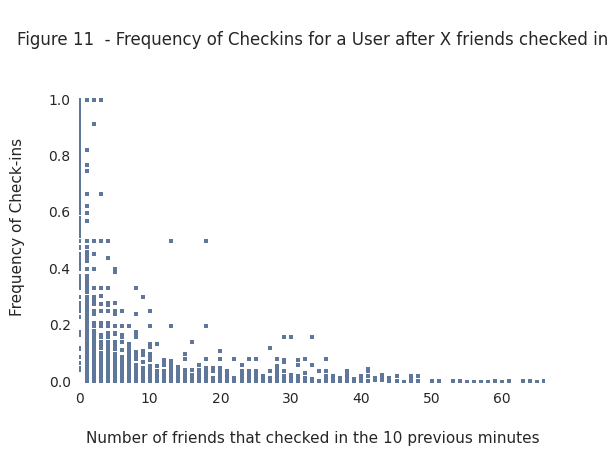

In [86]:
#Number of friends checked in with
X = []
#Frequencies of occurence
Y = []
temp = {}                              
#plotting
for uid in checkinwfriends:
    totalCheckins = nodes[uid]['number_of_checkins']
    for friendCount in checkinwfriends[uid]:
        try:
            Y.append(checkinwfriends[uid][friendCount]/float(totalCheckins))
            X.append(friendCount)
        except:
            pass
        
        if friendCount in temp:
            temp[friendCount].append(checkinwfriends[uid][friendCount]/float(totalCheckins))
        else:
            temp[friendCount] = [checkinwfriends[uid][friendCount]/float(totalCheckins)]

plot(X,Y,"\nFigure 11  - Frequency of Checkins for a User after X friends checked in\n", "\nNumber of friends that checked in the 10 previous minutes", "Frequency of Check-ins\n", ".", max(X), max(Y)+0.1)

Figure 11 represents the frequency of check-ins based on the number of friends that checked-in in the previous 10 minutes. While some interpretation of the data coult take place, we are now going to calculate the average to visualize the results more clearly and identify trends:

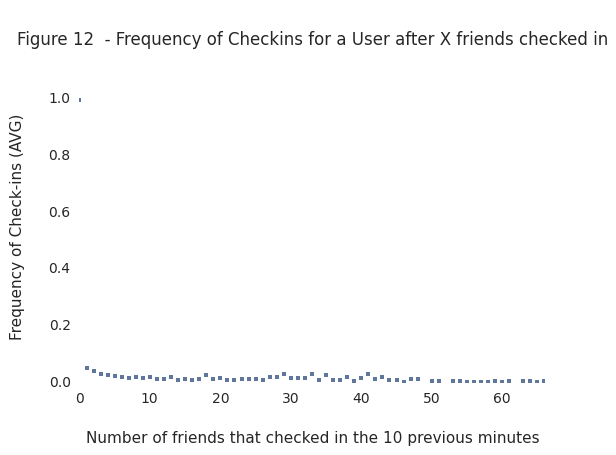

In [87]:
#Average 
Xavg = []
Yavg = []
for key in temp.keys():
    Xavg.append(key)
    Yavg.append(sum(temp[key])/float(len(temp[key])))
plot(Xavg,Yavg,"\nFigure 12  - Frequency of Checkins for a User after X friends checked in\n", "\nNumber of friends that checked in the 10 previous minutes", "Frequency of Check-ins (AVG)\n", ".", max(Xavg), max(Yavg)+0.1)

**This is very interesting. ** Figure 12 basically shows that no social learning took place in the Gowalla Social Network. As it can be seen, when X = 0, the average frequency of check-ins is almost 100%, indicating therfore that most users don't consider whether their friends have check-in in order to do so themselves. This could be for a few reasons, including that check-ins might simply occur automatically every so often (like other Connective Media applications such as Swarm), or because users are not clearly shown that their friends have checked in, suggesting the need to improve the design of Gowalla.

### 3.2 Reader-to-Leader Framework

We are now going to analyze which users are considered readers, contributors and leaders in the _Gowalla Social Network._ 

#### Identifying Readers and Contributors

The process for identifying readers and contributors is actually quite simple: 

* Calculate the number of checkins users have in total (to see how much they have contributed)
* Calculate the number of active days users were in the social network (to see for how long they were active)
* Divide these amounts to obtain a _Contribution Score_
* Plot them across users to see what users have the highest and lowest scores
* The interpretation of who is a reader and who is a contributor is left to the person considering scores

Fortunately, we already have all the information that we need:

In [99]:
Y = []
X = []

for node in nodes:
    if 'number_of_checkins' in nodes[node]:
        if 'number_of_active_days' in nodes[node]:
            X.append(node)
            Y.append(float(nodes[node]['number_of_checkins'])/nodes[node]['number_of_active_days'])

max_y = max(Y)
for i in range(len(Y)):
    Y[i] = Y[i]/max_y

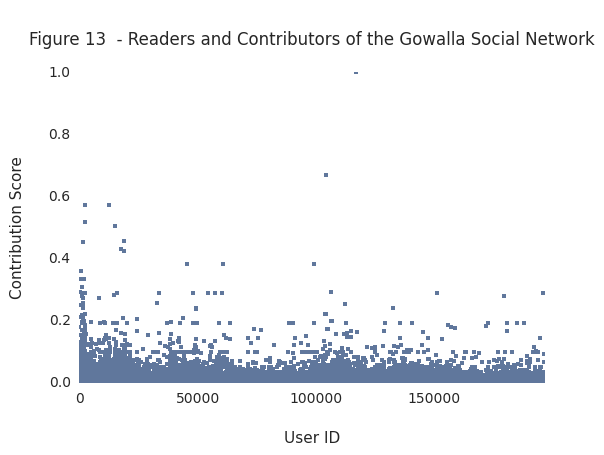

In [100]:
plot(X,Y,"\nFigure 13  - Readers and Contributors of the Gowalla Social Network\n", "\nUser ID", "Contribution Score\n", ".", max(X), max(Y))

Figure 13 describes the distribution of readers and contributors in the social network. Looking at the image, it is easy to see what users are the ones who contribute the most (based on the contribution score previously shown). As an example, it can be seen that the user with the ID around 10,000 is the top contributor to the social network.


#### Identifying Leaders

Identifying leaders is not as trivial, but fortunately from the information retrieved in previous analysis we can estimate who will be the leaders in the _Gowalla Social Netowrk_. We consider leaders to be the people who influence on others to contribute the most.

The process for obtaining leaders was as follows:

* Based on the analysis of how the check-in dynamic is influenced based on the contributions of other users, we added to a dictionary of leaders every node that contributed to the check-in of another person. In that sense, we then counted the number of times this occured for every potential leader, and once again decided to plot the results.

* We need to generate once again a leader score, dividing each number of users motivated to contribute by the potential leader by the highest score.

* The interpretation of what users are leaders are not are left to the reader, though a threshold is suggested.


In [101]:
X = []
Y = []

for node in leaders:
    X.append(node)
    Y.append(leaders[node])
    
max_y = max(Y)
for i in range(len(Y)):
    Y[i] = float(Y[i])/max_y

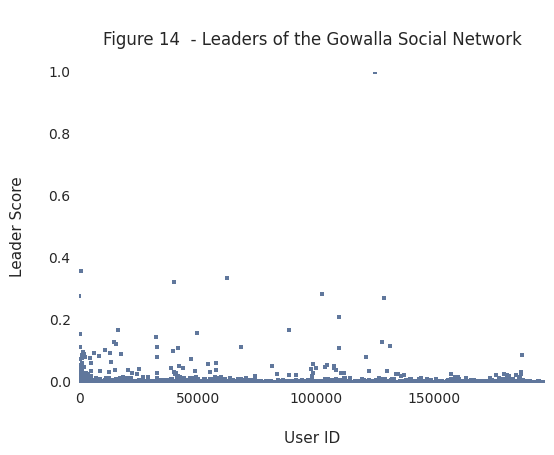

In [102]:
plot(X,Y,"\nFigure 14  - Leaders of the Gowalla Social Network\n", "\nUser ID", "Leader Score\n", ".", max(X), max(Y))

### 3.3 Strong Ties and Weak Ties

We are now going to analyze the strong ties and weak ties in the _Gowalla Social Network_. The idea is simple: compare every connection of friends and see how many friends they have in common. This will generate a score that can be interpreted as to what ties are strong (the higher the score) and which ones are weak (the lower the score).


In [ ]:
ties = {}

for node in nodes:
    friends_list = nodes[node]['friends_list']
    tie_value = 0
    ties[node] = {}
    for friend in friends_list:
        if friend > node and friend in ties:
            break
        friends_list2 = nodes[friend]['friends_list']
        for friend2 in friends_list:
            if friend2 in friends_list2:
                if friend != friend2:
                    tie_value += 1
                    
        if friend not in ties[node]:
            ties[node][friend] = tie_value
        else:
            ties[node][friend] += tie_value
        

Now that the score for every tie has been identified, the next step would be visualizing the results. Unfortunately, due to time constraints we were not able to implement this, but the idea we had in mind can be seen [here](http://flowingdata.com/2014/03/05/find-new-beers-to-drink/) 